# <center>Exploring Passenger Survival in a Plane Crash</center>
---

### Team:

* __1705012__ Akarsh Srivastav
* __1705019__ Aniket Das
* __1705068__ Sanat B. Singh
* __1705689__ Biswajeet Sahoo

This notebook covers the Machine Learning process used to analyse the plane crash survivors data provided in `Classification_train.csv` and `Classification_test.csv` <br>

The method used for predictions is Logistic Regression which gives us an accuracy of _95%_

---

## Importing Necessary Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Importing `warnings` module to ignore `FutureWarning` and `DeprecatedWarning`<br>
These warnings show us what features might get deprecated in future versions. The features work fine on the latest version as of today _3rd Nov 2018_

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Converting CSV into a DataFrame
A `CSV` file can be loaded as a DataFrame using `pandas.read_csv`
After loading, printing `info` and `head` to see what we're working with

### Information about the features
* __PassengerId__    ID of the passenger
* __Survived__    Passenger survived or not. 1 for Survived, 0 for did not
* __Pclass__    Classes like Business, Economy, etc.
* __Name__
* __Sex__
* __Age__
* __SibSp__    Number of Siblings or Spouses
* __Parch__   Number of Parents or Children
* __Ticket__   Ticket Number
* __Fare__    Ticket Fare
* __Cabin__    Cabin Number
* __Embarked__    Embarked from which Airport

In [3]:
dataset=pd.read_csv("Classification_train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       890 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Visualising Data
Visualising Data is essential to see which features are more important and which features can be dropped

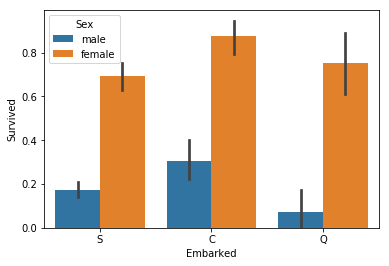

In [5]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=dataset);

As we can see from the above `barplot`, more females survived in a plane crash by a high margin

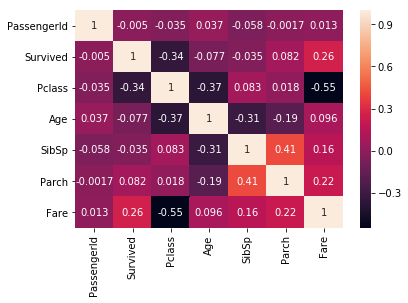

In [6]:
sns.heatmap(dataset.corr(), annot=True)

The _correlation heatmap_ shows that __Survived__ is most strongly related to __Fare__, which means that higher fares mean better security in case of a mishap

## Further Analysing the Data

In [7]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that the above description did not account for the columns __Name__, __Sex__, __Ticket__, __Cabin__, and __Embarked__ as they are non-numeric

### Non Numeric Values
The following code gives the number of non-numeric string/categorical data, unique values, and the most frequent values with their frequency

In [8]:
dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,890
unique,891,2,681,147,3
top,"Johnson, Mr. Alfred",male,347082,C23 C25 C27,S
freq,1,577,7,4,645


In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There seem to be some `NaN` values in the column __Cabin__
This shows that no data was availabe for the particular value.
Getting `NaN` values is common when dealing with real-world data and other columns might have missing data as well. We should check for these gaps before trying to apply any _Machine Learning_ algorithms to the dataset.

## Non-Existent Data

Thankfully, a `DataFrame` class contains a function `isnull()` which checks for `NaN` values and returns a boolean value `True` or `False`.<br>
We can count the number of `NaN` using `sum()` method

In [10]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         1
dtype: int64

In [11]:
dataset[['Pclass','Survived']].groupby(by=['Pclass'],as_index=False).mean() # p1 class passenger survived more

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Removing Unimportant Data
By analysing at the dataset we see that the following features play an insignificant role in survivability.

* __PassengerId__ Irrelevant to survival  
* __Name__ The title(Dr. Mr. etc) may or may not be useful high chance of irrelevance    
* __Cabin__ Too many `NaN`/`null` values might interfere with the accuracy
* __Ticket__ _Fare_ has already been considered thus eliminating the need to analyse the ticket number   


### Cleaning the Dataset
We can drop the unimportant columns from the dataset
Printing the `head()` to see what we're left with

In [12]:
dataset = dataset.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Resolving `NaN` values
The __Embarked__ column is a non-numeric categorical set with only one missing element.<br>
The following code fills the `NaN` value with the most frequent value

In [13]:
# Getting the most occured element using pandas get_dummies()
most_occ = pd.get_dummies(dataset['Embarked']).sum().sort_values(ascending=False).index[0] 
# The above snippet makes a descending sorted array of the Embarked column and gets the first value

def replace_nan(x):
#Function to get the most occured element in case of null else returns the passed value
    if pd.isnull(x):
        return most_occ
    else:
        return x

#Mapping the dataset according to replace_nan() function
dataset['Embarked'] = dataset['Embarked'].map(replace_nan)

## Splitting into Features and Dependent Variables
`X` will contain all the features
`y` will contain all the values observed that is the __Survived__ column

So far, we've been dealing with the training set

In [14]:
# Select all rows and all columns except 0
X=dataset.iloc[:,1:8].values

# Select all rows from column 0
y=dataset.iloc[:,0].values

## Importing the Test Data
Since we've dropped unimportant features from our training data, the testing data must also be in the same format for accurately predicting the result. Using the same __cleaning__ process as we did with the `train` dataset

In [15]:
# Load CSV into DataFrame
X_test=pd.read_csv("Classification_test.csv")
y_test=pd.read_csv("Classification_ytest.csv")

In [16]:
# Load CSV into DataFrame
X_test=pd.read_csv("Classification_test.csv")
y_test=pd.read_csv("Classification_ytest.csv")

X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


`X_test` is in the same format as our dataset, excluding the __Survived__ Column
__Columns that need to be dropped are :__
* PassengerId
* Name
* Ticket
* Cabin

In [17]:
X_test= X_test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).iloc[:,:].values

In [18]:
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


`y_test` only needs to drop the __PassengerId__ column

In [19]:
y_test=y_test.drop(columns = 'PassengerId', axis=1).iloc[:,:].values

Now that the `train` and `test` data is in the same format, we can proceed to manipulation of data

## Using Imputer to fill `NaN` values

__Age__ column has many `NaN` values which we will fill with the _median_/_most frequent_ age from the dataset
__Fare__ column has some `NaN` values in the `test` dataset which we plan on filling with the mean fare

In [22]:
# Age column having 177 missing values : dataset['Age'].isnull().sum() in training 
# Also for test dataset.

from sklearn.preprocessing import Imputer

# Check for NaN values and set insert strategy to median
imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
# imputer only accepts 2D matrices
# Passing values [:, n:n+1] only passes the nth columnn
# Here the 2nd column is the Age
imputer = imputer.fit(X[:,2:3]) 
X[:,2:3] = imputer.transform(X[:,2:3])

imputer = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imputer = imputer.fit(X_test[:,2:3])
X_test[:,2:3] = imputer.transform(X_test[:,2:3])

# Using insert strategy mean
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# The 5th column is the Fare
imputer = imputer.fit(X_test[:,5:6])
X_test[:,5:6] = imputer.transform(X_test[:,5:6])

After the above snippet has executed, `imputer` will have replaced all the NaN values with the specified insert strategy.
Now we can move on to encoding and fitting the dataset into an Algorithm

## Encoding
### Label Encoding
`LabelEncoder` is used to convert non-numerical string/categorical values into numerical values which can be processed using various `sklearn` classes
It encodes values between `0` and `n-1`; where `n` is the number of categories

The features which need encoding are:
* Sex
* Embarked

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

# Column 6 is Embarked
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])
X_test[:, 6] = labelencoder_X.fit_transform(X_test[:, 6])

# Column 1 is Sex
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X_test[:, 1] = labelencoder_X.fit_transform(X_test[:, 1])

### One Hot Encoding
Often when we use `LabelEncoder` on more than 2 categories the Machine Learning algorithm might try to find a relation between the values such as _Increasing_ or _Decreasing_ or in a pattern. This results in lower accuracy.

To avoid this we can further encode the `Labels` using `OneHotEncoder`, it takes a column which has categorical data, which has been `label encoded`, and then splits the column into multiple columns. The numbers are replaced by `1`s and `0`s, depending on which column has what value. Thus the name `OneHotEncoder`

In [24]:
onehotencoder = OneHotEncoder(categorical_features = [0,1,6])
# 0 : Pclass column
# 1 : Sex
# 6 : Embarked

# OneHotEncoder takes and array as input
X = onehotencoder.fit_transform(X).toarray()
X_test = onehotencoder.fit_transform(X_test).toarray()

With `One Hot Encoding` complete, we can proceed to `fit` the data into our `LogisticRegressor`

## Predicting the Output

### `LogisticRegression`
`LogisticRegression` is used only when the __dependent variable__/__prediction__ is binary i.e only consists of two values. `LogisticRegression` is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [25]:
from sklearn.linear_model import LogisticRegression

#Initializing the regressor
lr = LogisticRegression()

# Fitting the regressor with training data
lr.fit(X,y)

# Getting predictions by feeding features from the test data
y_pred = lr.predict(X_test)

## Checking the Predictions
Creating a scatter plot of `actual` versus `predicted` values

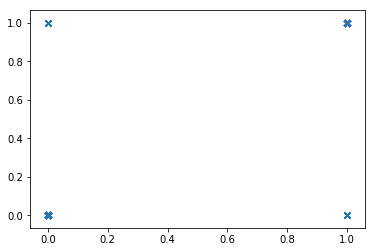

In [26]:
plt.scatter(y_test, y_pred, marker='x')

### Confusion Matrix
`ConfusionMatrix` is used to compare the data predicted versus the actual output.
It is a matrix in the form:
![Confusion Matrix](https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png)

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[254  12]
 [ 10 142]]


### Classification Report
To get the accuracy, we use `ClassificationReport` which measures the acuracy of the algorithm based on a `ConfusionMatrix`<br>
An ideal `classifier` with `100%` accuracy would produce a pure _diagonal matrix_ which would have all the points predicted in their correct class.

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.93       152

   micro avg       0.95      0.95      0.95       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.95      0.95       418



## Conclusion

After analysing the given dataset and using `LogisticRegression` on the features, we see that the algorithm can accurately predict the survivability of a Passenger `95%` of the time.